<a href="https://colab.research.google.com/github/myreposi/Ds_Samples/blob/master/CVision_Yolo_exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt 
import cv2 as cv

TypeError: ignored

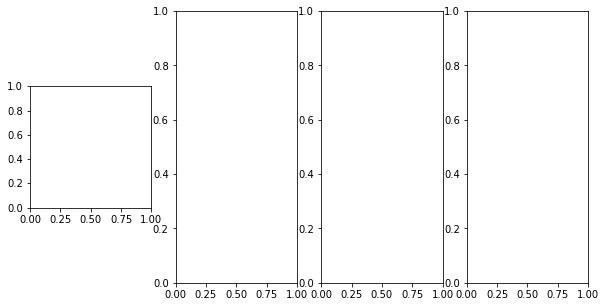

In [3]:
fig,ax = plt.subplots(1,4,figsize=(10,5))
image = cv.imread("../input/sptire/train/images/14_19_l_jpg.rf.8323d9f848377e32ca451017a3a80731.jpg")
ax[0].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0719_JPEG.rf.05f197445c4a42854e0b1f308fb4e636.jpg")
ax[1].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0680_JPEG.rf.560c49e01182db8356989ddc604557fb.jpg")
ax[2].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0701_JPEG.rf.d5ae66ab383142ef5d59b0454a19fdce.jpg")
ax[3].imshow(image)
fig.show()

In [7]:
%cd ../
!mkdir tmp
%cd tmp

/content
/content/tmp


In [8]:
# Download YOLOv5
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
# Install dependencies
%pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 14936, done.
remote: Total 14936 (delta 0), reused 0 (delta 0), pack-reused 14936
Receiving objects: 100% (14936/14936), 13.98 MiB | 25.71 MiB/s, done.
Resolving deltas: 100% (10267/10267), done.
/content/tmp/yolov5
/content/tmp
Setup complete. Using torch 1.13.0+cu116 (CPU)


In [9]:
import yaml

data_yaml = dict(
    train = '../../input/sptire/train',
    val = '../../input/sptire/valid',
    nc = 1,
    names = ['Tire']
)

# Note that I am creating the file in the yolov5/data/ directory.
with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [10]:
%cd yolov5

/content/tmp/yolov5


In [11]:
!wandb disabled
!python train.py --img 416 --batch 16 --epochs 50 --data ../data.yaml --weights yolov5n.pt

/bin/bash: wandb: command not found
train: weights=yolov5n.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7,

In [ ]:
img = cv.imread("runs/train/exp/val_batch0_pred.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img)

In [ ]:
!python detect.py --source ../../input/sptire/test/images/IMG_0672_JPEG.rf.c37833de9c2310cfba797a83f239d3c1.jpg --weights runs/train/exp/weights/best.pt

In [ ]:
img = cv.imread("runs/detect/exp/IMG_0672_JPEG.rf.c37833de9c2310cfba797a83f239d3c1.jpg")
plt.imshow(img)